Aim: Download the famous dataset and Implement KNN algorithm to 
predict the class to which these plants belong, Calculate the performance 
matric and compare the error rate with K value( K value range)

In [20]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [21]:
# Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target


In [ ]:

df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

print(df.head())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
# Evaluate the accuracy on the test set
accuracy = knn.score(X_test, y_test)
print(f"Accuracy with K=5: {accuracy * 100:.2f}%")

Accuracy with K=5: 96.30%


In [ ]:

y_pred = knn.predict(X_test)

In [ ]:

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[19  0  0]
 [ 1 19  1]
 [ 0  0 14]]


In [28]:
# Range of K values to test
k_range = range(1, 26)
error_list = []


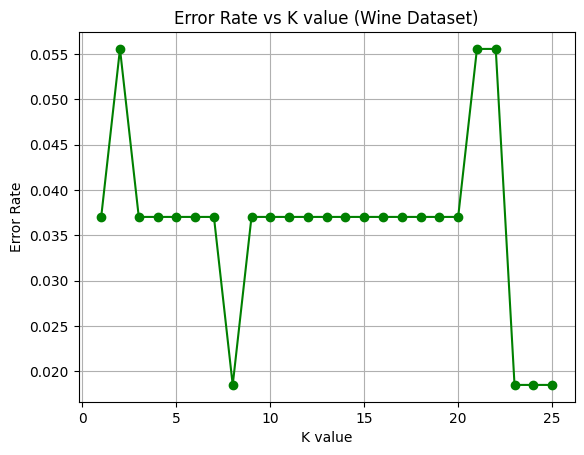

In [29]:
# Iterate through K values and calculate error rate
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate = 1 - metrics.accuracy_score(y_test, y_pred)
    error_list.append(error_rate)

# Plot Error Rate vs K values
plt.plot(k_range, error_list, marker='o', color='g')
plt.title('Error Rate vs K value (Wine Dataset)')
plt.xlabel('K value')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()